# ___Imports___

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# import plotly.express as px
# from geopy.geocoders import Nominatim
# import geopy as gp
# from datetime import datetime
# from glob import glob

## ___NASA data___

In [41]:
# load data for nasa
nasa_data = pd.read_csv('../data/meteorite-landings.csv')
print(nasa_data.columns)

nasa_data.head()
np.shape(nasa_data)

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')


(45716, 10)

## ___IMO data___

In [42]:
# load data for imo
imo_data = pd.read_csv('../data/IMO/data/IMO9920.csv')
print(imo_data.columns)

imo_data.head()
np.shape(imo_data)

Index(['Session ID', 'Start Date', 'Observer ID', 'Submitter ID',
       'Actual Observer Name', 'Submitted by', 'City', 'Country', 'Latitude',
       'Longitude', 'Elevation'],
      dtype='object')


(42989, 11)

## ___Combining data___

In [43]:
# Combine the 2 datasets into 1
all_data = pd.concat([nasa_data, imo_data], sort=False, keys=['NASA', 'IMO'])
# Show columns, first 5 rows, and shape to verify combination
print(all_data.columns)
print(all_data.head)
np.shape(all_data)


Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation', 'Session ID', 'Start Date', 'Observer ID',
       'Submitter ID', 'Actual Observer Name', 'Submitted by', 'City',
       'Country', 'Latitude', 'Longitude', 'Elevation'],
      dtype='object')
<bound method NDFrame.head of                 name     id nametype     recclass      mass  fall    year  \
NASA 0        Aachen    1.0    Valid           L5      21.0  Fell  1880.0   
     1        Aarhus    2.0    Valid           H6     720.0  Fell  1951.0   
     2          Abee    6.0    Valid          EH4  107000.0  Fell  1952.0   
     3      Acapulco   10.0    Valid  Acapulcoite    1914.0  Fell  1976.0   
     4       Achiras  370.0    Valid           L6     780.0  Fell  1902.0   
...              ...    ...      ...          ...       ...   ...     ...   
IMO  42984       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
     42985       NaN    NaN      NaN          NaN

(88705, 21)

# ___NOTES___

- Before Sampling
- Nasa data ranges from index 0:45715
- IMO data ranges from index 45716:end

## ___Cleaning___

In [44]:
# Confirmation of dropped columns
print(all_data.head)
print(np.shape(all_data))

<bound method NDFrame.head of                 name     id nametype     recclass      mass  fall    year  \
NASA 0        Aachen    1.0    Valid           L5      21.0  Fell  1880.0   
     1        Aarhus    2.0    Valid           H6     720.0  Fell  1951.0   
     2          Abee    6.0    Valid          EH4  107000.0  Fell  1952.0   
     3      Acapulco   10.0    Valid  Acapulcoite    1914.0  Fell  1976.0   
     4       Achiras  370.0    Valid           L6     780.0  Fell  1902.0   
...              ...    ...      ...          ...       ...   ...     ...   
IMO  42984       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
     42985       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
     42986       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
     42987       NaN    NaN      NaN          NaN       NaN   NaN     NaN   
     42988       NaN    NaN      NaN          NaN       NaN   NaN     NaN   

              reclat    reclong              

In [45]:
# Drop unnecessary columns

all_data = all_data.drop(['name', 'nametype', 'GeoLocation', 'Observer ID', 'Submitter ID', 'Actual Observer Name', 'Submitted by'], axis=1)

In [46]:
# Check for Null Values

all_data.isnull().sum()


id            42989
recclass      42989
mass          43120
fall          42989
year          43277
reclat        50304
reclong       50304
Session ID    45716
Start Date    45716
City          45728
Country       45728
Latitude      45728
Longitude     45728
Elevation     45728
dtype: int64

In [47]:
# merge IMO ids to NASA NaN ids
all_data['id'] = all_data['id'].replace(np.NaN, all_data['Session ID'][45716:])

In [48]:
# merge IMO latitudess to NASA NaN latitudes
all_data['reclat'] = all_data['reclat'].replace(np.NaN, all_data['Latitude'][45716:])

In [49]:
# merge IMO longitudes to NASA NaN longitudes
all_data['reclong'] = all_data['reclong'].replace(np.NaN, all_data['Longitude'][45716:])

In [50]:
# Convert the IMO Start Date to NASA year
for i in range(45716, np.shape(all_data)[0]):
    all_data['Start Date'][i] = all_data['Start Date'][i][:4]

all_data['Start Date'].tail

<bound method NDFrame.tail of NASA  0         NaN
      1         NaN
      2         NaN
      3         NaN
      4         NaN
               ... 
IMO   42984    2005
      42985    2005
      42986    2005
      42987    2005
      42988    2005
Name: Start Date, Length: 88705, dtype: object>

In [51]:
# merge IMO start dates to NASA NaN year
all_data['year'] = all_data['year'].replace(np.NaN, all_data['Start Date'][45716:])

In [52]:
print(all_data.isnull().sum())

id                0
recclass      42989
mass          43120
fall          42989
year            288
reclat         7327
reclong        7327
Session ID    45716
Start Date    45716
City          45728
Country       45728
Latitude      45728
Longitude     45728
Elevation     45728
dtype: int64


In [53]:
test = all_data['Start Date'].iloc[45716]
test[:4]

'2008'

In [54]:
all_data.columns

Index(['id', 'recclass', 'mass', 'fall', 'year', 'reclat', 'reclong',
       'Session ID', 'Start Date', 'City', 'Country', 'Latitude', 'Longitude',
       'Elevation'],
      dtype='object')

In [55]:
# Rename (and Re-drop) columns
all_data = all_data.drop(['Session ID', 'Start Date', 'City', 'Country', 'Latitude', 'Longitude'], axis=1)
all_data.rename(columns={'recclass':'class', 'reclat':'lat', 'reclong':'long'}, inplace=True)

In [56]:
print(all_data.columns)
print(np.shape(all_data))
print(all_data.isnull().sum())
# FIXME half the values are NaN in some columns, due to there being no correlated match on the other dataset. Find a solution to get rid of NaN values

Index(['id', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'Elevation'], dtype='object')
(88705, 8)
id               0
class        42989
mass         43120
fall         42989
year           288
lat           7327
long          7327
Elevation    45728
dtype: int64


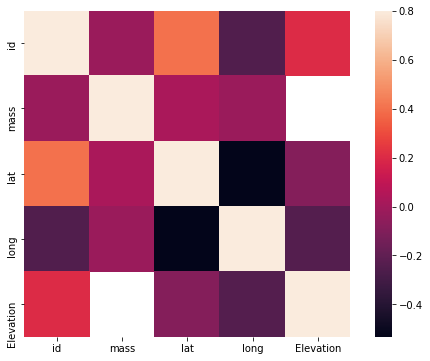

In [57]:
# heat map of correlation of features
correlation_matrix = all_data.corr()
fig = plt.figure(figsize=(9,6))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
# Dimensionality Reduction (PCA)

In [ ]:
# Standardization / Normalization

In [ ]:
# Check for Catergorical Data (Encoding)
# Fall and Class are categorical

In [2]:
all_data.head

NameError: name 'all_data' is not defined

In [58]:
all_data.to_csv('../data/ALL_DATA.csv', index = False)


## Sampling
### (Test sample size is set to 10%)
### Only comment out once all testing / experiment is done, to use real data
---

In [22]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(all_data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
# all_data['year'].fillna(0).astype(int)
# all_data['mass'].fillna(0).astype(int)


all_data = all_data.sample(frac=0.1)  # 10% sample set
print(all_data.describe())


Original Data Stats: 

                 id          mass          year        reclat       reclong  \
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000   
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319   
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298   
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330   
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000   
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670   
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670   
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330   

         Session ID   Observer ID  Submitter ID      Latitude     Longitude  \
count  42989.000000  42669.000000  42989.000000  42977.000000  42977.000000   
mean   47933.908302   3265.037639   3290.464863     40.289017     19.033399   
std    24835.304749   2840.0